# Tutorial 2 - Resting State Networks



In [4]:
%pylab inline
from tvb.simulator.lab import *
import utils
import seaborn as sns

`%matplotlib` prevents importing * from pylab and numpy
:0: FutureWarning: IPython widgets are experimental and may change in the future.


Populating the interactive namespace from numpy and matplotlib


In [5]:
cv = 6.6938775510204085
D = 0.00042919342601287783
cs = 0.032374575428176434
dt = 0.1
tr = 1000.0 # BOLD response time
simlen = 500.0

sim = simulator.Simulator(
    model=models.Generic2dOscillator(a=-1.0),
    connectivity=connectivity.Connectivity(load_default=True, speed=8.8),
    coupling=coupling.Linear(a=cs),
    integrator=integrators.HeunStochastic(dt=dt, noise=noise.Additive(nsig=array([D]))),
    monitors=monitors.TemporalAverage(period=1.0)
)

sim.configure()
(t, y), = utils.run_sim_with_progress_bar(sim, simlen)

2016-02-12 19:49:00,542 - WARNING - tvb.basic.readers - File hemispheres not found in ZIP.
[..................................................] 100 % Wall Time: 0 minute(s), 2 seconds(s)

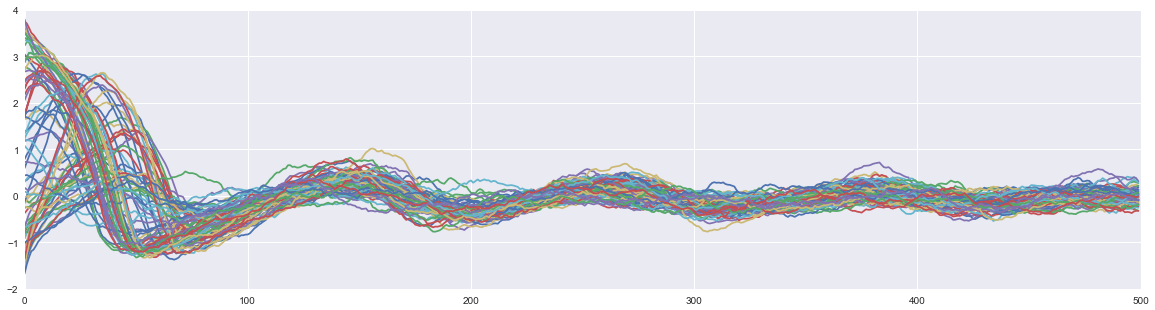

In [7]:
# drop transient & center time series
ti = 0.0
y_ = y[t > ti, 0, :, 0]
t_ = t[t > ti]
y_mean = y_.mean(axis=0)
y_ -= y_mean

figure(figsize=(20, 5))
#imshow(y.T, aspect='auto', interpolation='nearest', cmap=plt.cm.coolwarm)
#colorbar()
plot(y_);

In [8]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=5, max_iter=250)
ica.fit(y_)

In [10]:
ica

FastICA(algorithm='parallel', fun='logcosh', fun_args=None, max_iter=250,
    n_components=30, random_state=None, tol=0.0001, w_init=None,
    whiten=True)

(array([  1,   0,   1,   0,   1,   1,   3,   3,   8,  10,   8,  13,  25,
         33,  31,  47,  63,  77,  77, 104, 125, 136, 158, 189, 136, 164,
        147, 150, 107, 108,  73,  73,  60,  33,  38,  21,  10,  16,   9,
          9,   2,   2,   5,   0,   1,   0,   0,   0,   1,   1]),
 array([-0.17063712, -0.16359968, -0.15656224, -0.14952479, -0.14248735,
        -0.13544991, -0.12841247, -0.12137503, -0.11433759, -0.10730015,
        -0.10026271, -0.09322527, -0.08618783, -0.07915039, -0.07211295,
        -0.06507551, -0.05803806, -0.05100062, -0.04396318, -0.03692574,
        -0.0298883 , -0.02285086, -0.01581342, -0.00877598, -0.00173854,
         0.0052989 ,  0.01233634,  0.01937378,  0.02641122,  0.03344866,
         0.04048611,  0.04752355,  0.05456099,  0.06159843,  0.06863587,
         0.07567331,  0.08271075,  0.08974819,  0.09678563,  0.10382307,
         0.11086051,  0.11789795,  0.12493539,  0.13197283,  0.13901028,
         0.14604772,  0.15308516,  0.1601226 ,  0.16716004,

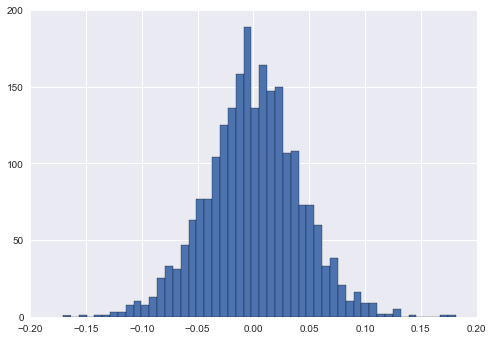

In [11]:
hist(ica.components_.ravel(), 50)

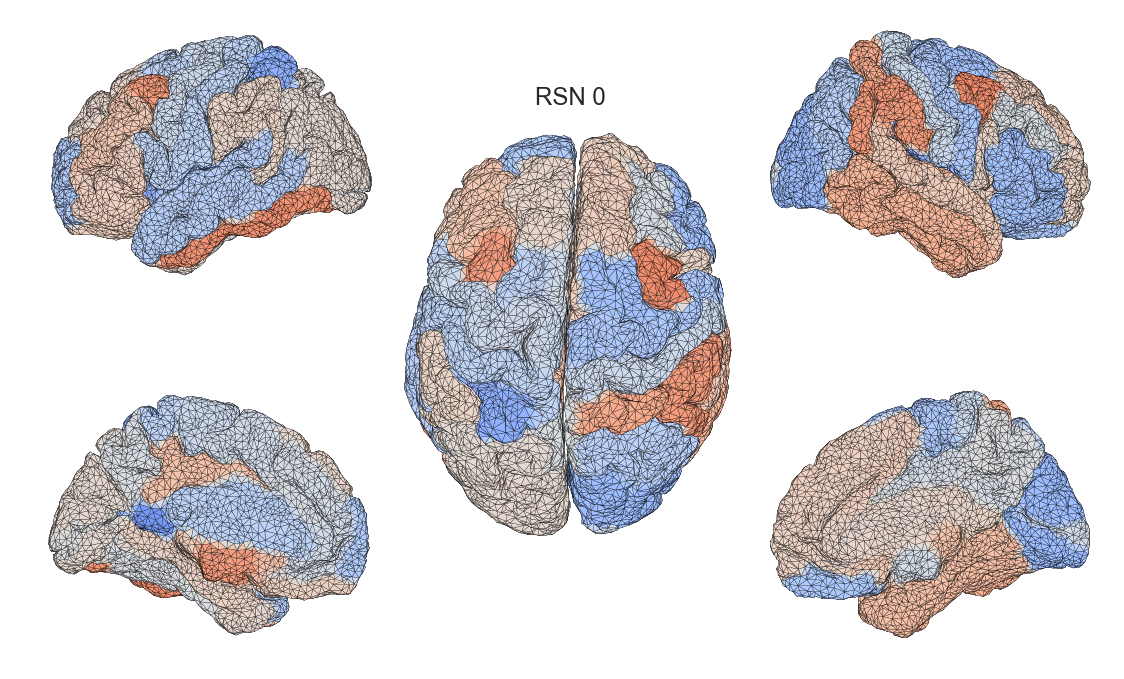

In [21]:
reload(utils)
for i, comp in enumerate(ica.components_[1:]):
    utils.multiview(comp[utils.cortex.region_mapping], shaded=False, 
                           suptitle='RSN %d' % (i, ),
                           zlim=0.15)
    break